<a href="https://colab.research.google.com/github/ansonsibi1/Team_KASAR-Anson-Sibi-M4W3_Rossmann_Sales_Prediction_Capstone_Project/blob/main/Team_KASAR_Anson_Sibi_M4W3_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

Steps To Follow :-\
\
1) Loading Libraries\
\
2) Loading Dataset\
2.1) Data Exploration\
\
3) Data Cleaning and Preparation\
3.1) Checked for Missing & Null Values(distplot, boxplot)\
3.2) Check columns using value_counts()\
3.3) Data Merging\
3.4) Data Extraction (Week NUmber)\
\
4) Exploratory Data Analysis\
4.1) Indepent variables vs dependent variables plot (heatmap,barplot,scatterplot)\
4.2) Hypotheisis Testing (barplot,lineplot,scatterplot)\
\
5) Feature Engineering\
5.1) Data Manipulation (Open = 0 & Sales = 0)\
5.2) Encoding (StateHoliday, StoreType, Assortment, CompetitionDistance)\
\
6) Model Selection\
6.1) Feature Selection and Train & Test Set\
6.2) Data Transformation (MinMax)\
6.3) Linear Regression Model\
6.4) Regularization & Cross Validation\
6.5) Random Forest Model (Max Depth = 8)\
6.6) Hyper Parameter Tunning\
6.7) Check Metrics, Feature Importance & Create Dataset\
\
7) Sales Prediction

# Loading Libraries :

In [ ]:
# Libraries for Basic Operations on Dataset and Plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We will be using the Numpy library for numerical operations and Pandas library for data analysis. We also have matplotlib and seaborn libraries that will be used for plotting. %matplotlib inline is to display the plots inside the notebook.

In [ ]:
# Setting Parameters for the plots

plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

Here we are setting the parameters for the plots before start the plotting.

In [ ]:
import warnings
warnings.simplefilter('ignore')

We have imported the warnings library to ignore the warnings that promopted at runtime.

# Loading Datasets :

In [ ]:
# Mounting the google drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We import drive from google library to mount the google drive to the google colab.

In [ ]:
# Loading the first dataset
sales_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Project/Rossmann Sales Prediction  - Capstone Project/Rossmann Stores Data (1).csv',parse_dates=['Date'])

We are loading the first dataset i.e. the sales dataset which is the Rossmann Stores Data as `sales_df`.

In [ ]:
# Loading the second dataset
store_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Project/Rossmann Sales Prediction  - Capstone Project/store.csv')

We are loading the second dataset i.e. the store dataset which is the Stores as `store_df`.

# Data Exploration :

In [ ]:
# Check shape of the first dataset
sales_df.shape

(1017209, 9)

The shape of the `sales_df` is 1017209 rows and 9 columns.

In [ ]:
# Check columns of the first dataset
sales_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

The columns of the `sales_df` are `Store`,`DayOfWeek`,`Date`,`Sales`,`Customers`,`Open`,`Promo`,`StateHoliday`,`SchoolHoliday`.

In [ ]:
# Check the first 5 rows of the dataset
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


This shows the first 5 rows of the `sales_df` which helps us understand the data we have in each row.

In [ ]:
# Check the last 5 rows of the dataset
sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


This shows the last 5 rows of the `sales_df` which helps us understand the data we have in each row.

In [ ]:
# Check basic infomation about the dataset

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


Here we can see that the `sales_df` has in total 9 columns and the datatypes for those columns are 1 datetime, 7 int and 1 object type.

In [ ]:
# Check shape of the second dataset
store_df.shape

(1115, 10)

The shape of the `store_df` is 1115 rows and 10 columns.

In [ ]:
# Check columns of the second dataset
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

The columns of the `store_df` are `Store`,`StoreType`,`Assortment`,`CompetitionDistance`,`CompetitionOpenSinceMonth`,`CompetitionOpenSinceYear`,`Promo2`,`Promo2SinceWeek`,`Promo2SinceYear`,`PromoInterval`.

In [ ]:
# Check the first 5 rows of the dataset
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


This shows the first 5 rows of the `store_df` which helps us understand the data we have in each row.

In [ ]:
# Check the last 5 rows of the dataset
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


This shows the last 5 rows of the `store_df` which helps us understand the data we have in each row.

In [ ]:
# Check basic infomation about the dataset

store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Here we can see that the `store_df` has in total 10 columns and the datatypes for those columns are 5 float, 2 int and 3 object type.

# Data Cleaning And Preparation :

## Data Cleaning :

In [ ]:
# Check total null values in first dataset

sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

As we can see there are no null values in the `sales_df`.

In [ ]:
# Check total null values in second dataset

store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In the `store_df` we can see that there are
* 3 NaN values in `CompetitionDistance`
* 354 NaN values in `CompetitionOpenSinceMonth` and `CompetitionOpenSinceWeek`
* 544 NaN values in `Promo2SinceWeek`, `Promo2SinceYear` and `PromoInterval`.

We have to check the percentage of null values in each column.

In [ ]:
# Check percentage of null values in CompetitionDistance column

print(f"Percentage of Null Values : {(store_df.CompetitionDistance.isnull().sum()/store_df.shape[0])*100} %")

Percentage of Null Values : 0.26905829596412556 %


We found that there are 0.26% of NaN values in the `CompetitionDistance` column. The percentage mentioned above is small so we have to look into the data.

In [ ]:
# Check rows with null values in CompetitionDistance column

store_df[store_df.CompetitionDistance.isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


When we looked into the data, we found that the other columns had proper data present in the them so we have decided to replace the data insteaded of removing it. 

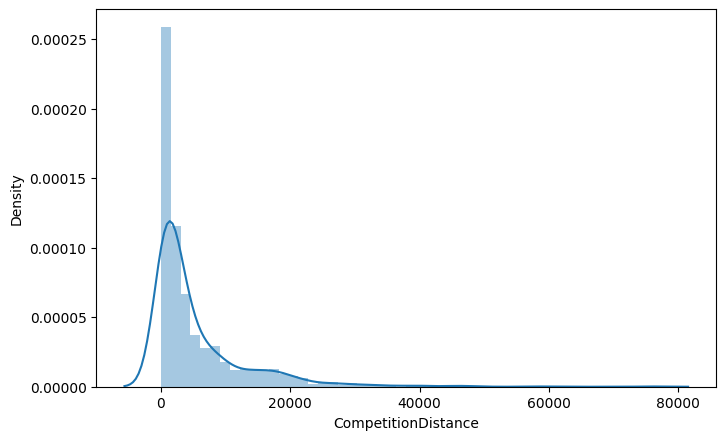

In [ ]:
sns.distplot(store_df.CompetitionDistance)

Since the plot is positively skewed so we will use the medain to replace the NaN values in the `CompetitionDistance` column.

In [ ]:
# Replacing the null values with meadian in the CompetitionDistance column

store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(),inplace=True)

We use fillna() to replace the NaN values with the medain values of the `CompetitionDistance` column.

In [ ]:
# Check percentage of null values in CompetitionOpenSinceMonth column

print(f"Percentage of Null Values : {(store_df.CompetitionOpenSinceMonth.isnull().sum()/store_df.shape[0])*100} %")

Percentage of Null Values : 31.748878923766817 %


We found that there are 31.74% of NaN values in the `CompetitionOpenSinceMonth` column. The percentage mentioned above is big so we have to remove this column as approximately 1/3 of the column has null values and replacing those values would effect the final prediction.

In [ ]:
# Check percentage of null values in CompetitionOpenSinceYear column

print(f"Percentage of Null Values : {(store_df.CompetitionOpenSinceYear.isnull().sum()/store_df.shape[0])*100} %")

Percentage of Null Values : 31.748878923766817 %


We found that there are 31.74% of NaN values in the `CompetitionOpenSinceYear` column. The percentage mentioned above is big so we have to remove this column as approximately 1/3 of the column has null values and replacing those values would effect the final prediction.

In [ ]:
# Check percentage of null values in Promo2SinceWeek column

print(f"Percentage of Null Values : {(store_df.Promo2SinceWeek.isnull().sum()/store_df.shape[0])*100} %")

Percentage of Null Values : 48.789237668161434 %


We found that there are 48.78% of NaN values in the `Promo2SinceWeek` column. The percentage mentioned above is huge so we have to remove this column as approximately 1/2 of the column has null values and replacing those values would effect the final prediction.

In [ ]:
# Check percentage of null values in Promo2SinceYear column

print(f"Percentage of Null Values : {(store_df.Promo2SinceYear.isnull().sum()/store_df.shape[0])*100} %")

Percentage of Null Values : 48.789237668161434 %


We found that there are 48.78% of NaN values in the `Promo2SinceYear` column. The percentage mentioned above is huge so we have to remove this column as approximately 1/2 of the column has null values and replacing those values would effect the final prediction.

In [ ]:
# Check percentage of null values in PromoInterval column

print(f"Percentage of Null Values : {(store_df.PromoInterval.isnull().sum()/store_df.shape[0])*100} %")

Percentage of Null Values : 48.789237668161434 %


We found that there are 48.78% of NaN values in the `PromoInterval` column. The percentage mentioned above is huge so we have to remove this column as approximately 1/2 of the column has null values and replacing those values would effect the final prediction.

In [ ]:
# Removing the columns with higher percentage of null values

store_df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval'],axis=1,inplace=True)

So, we use the drop() to drop the column from `store_df` that have higher percentage of null values i.e. `CompetitionOpenSinceMonth`, `CompetitionOpenSinceWeek`,
 `Promo2SinceWeek`, `Promo2SinceYear` and `PromoInterval`.

Now, we don't have any null values or missing values in both the datasets so we can go to the merging step.

## Data Merging :

In [ ]:
# Merge the two datasets

store_sales_df = pd.merge(sales_df,store_df,how='left',on='Store')

We left join the `sales_df` and `store_df` to `store_sales_df` using the merge() on the `Store` column.

In [ ]:
# Check shape of the dataset

store_sales_df.shape

(1017209, 13)

The shape of the `store_sales_df` is 1017209 rows and 13 columns.

In [ ]:
# Check the first 5 rows of the dataset

store_sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0


This shows the first 5 rows of the `store_sales_df` which helps us understand the data we have in each row.

In [ ]:
# Check the last 5 rows of the dataset

store_sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,1


This shows the last 5 rows of the `store_sales_df` which helps us understand the data we have in each row.

In [ ]:
# Check total null values in the dataset

store_sales_df.isnull().sum()

Store                  0
DayOfWeek              0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

As we can see there are no null values in the `store_sales_df`.

In [ ]:
# Check basic infomation about the dataset

store_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   StateHoliday         1017209 non-null  object        
 8   SchoolHoliday        1017209 non-null  int64         
 9   StoreType            1017209 non-null  object        
 10  Assortment           1017209 non-null  object        
 11  CompetitionDistance  1017209 non-null  float64       
 12  Promo2               1017209 non-null  int64         
dt

Here we can see that the `store_sales_df` has in total 13 columns and the datatypes for those columns are 1 datetime, 1 float, 8 int and 3 object type.

In [ ]:
# Check descriptive stats for the dataset

store_sales_df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1017209,1017209,1.017209e+06,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN,4,3,NaN,NaN
top,NaN,NaN,2015-07-31 00:00:00,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN,551627,537445,NaN,NaN
first,NaN,NaN,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-07-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01,NaN,NaN,5.422021e+03,5.005638e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01,NaN,NaN,7.706918e+03,4.999999e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.000000e+01,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,7.100000e+02,0.000000e+00


After doing the descriptive statistical analysis we know the mean, std, quartile ranges, min and max values for the columns in `store_sales_df`.

## Data Preparation :

In [ ]:
store_sales_df.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

While checking the data in `store_sales_df` we found that `StateHoliday` had both number and string type values so to remove any kind of misunderstanding we will change the values to the same datatype.

In [ ]:
# Changing datatype of the StateHoliday values

store_sales_df.StateHoliday = store_sales_df.StateHoliday.apply(str)

The apply() will change the datatype of all the numeric values to string type.

In [ ]:
store_sales_df.StateHoliday.value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

As we can see all the values in the `StateHoliday` column are of string type.

# Exploratory Data Analysis :

In Exploratory Data Analysis, first of all we are going to come up with some hypothesis to test and derive some insights and conclusions from the data.

The Hypothesis that we are going to test are :-

* Stores should sell more over the years.
* Stores should sell less on weekends.
* Stores with closer competitors should sell less.
* Store type with a larger assortment of products should sell more.
* Number of Customers should have a positive correlation with Sales.
* Stores with promotion should have high Sales.

Before we start with Hypothesis Testing we have to plot some plots between the Independent and Dependent variables.

## Independent Vs Dependent Variables :

1. **Sales Vs Store :** 

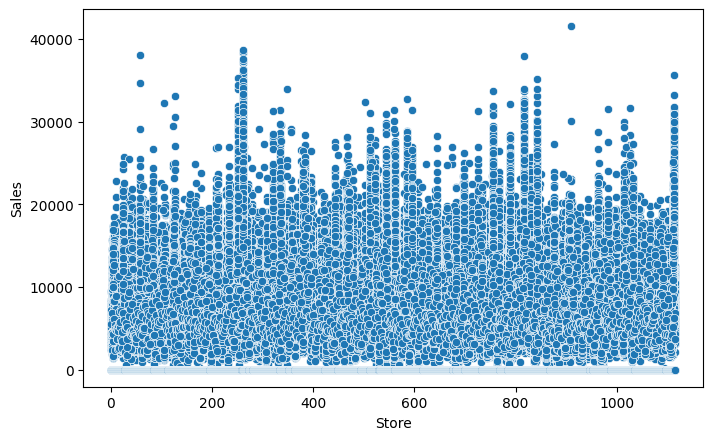

In [ ]:
# Scatterplot for Store and Sales column

sns.scatterplot(store_sales_df.Store,store_sales_df.Sales)

* The `Sales` for most of the `Stores` is below 20000.

2. **Sales Vs DayOfWeek :**

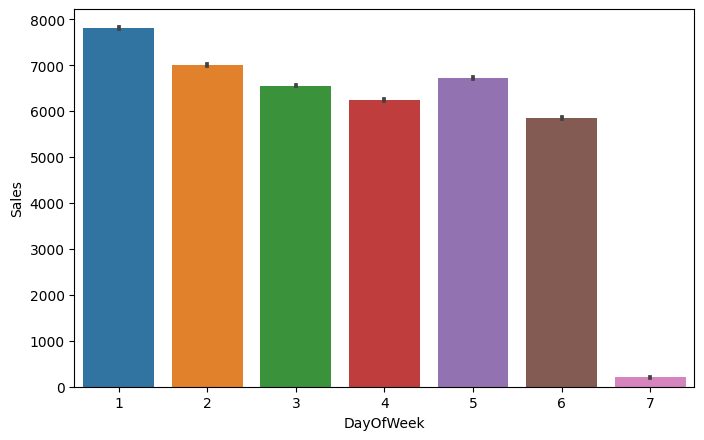

In [ ]:
# Barplot for DayOfWeek and Sales column

sns.barplot(store_sales_df.DayOfWeek,store_sales_df.Sales)

* From the above plot we can say that `Sales` is highest on Monday's.


3. **Sales Vs Customer :**

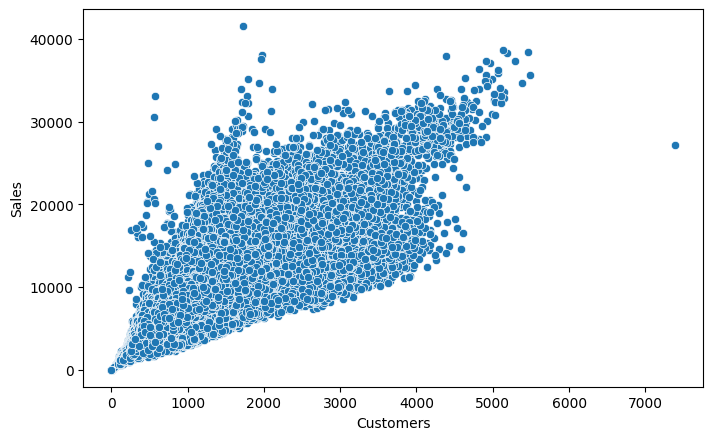

In [ ]:
# Scatterplot for Customers and Sales column

sns.scatterplot(store_sales_df.Customers,store_sales_df.Sales)

* There is a Linear relation between `Sales` and `Customers`.

4. **Sales Vs Month :**

Text(0.5, 0, 'Month')

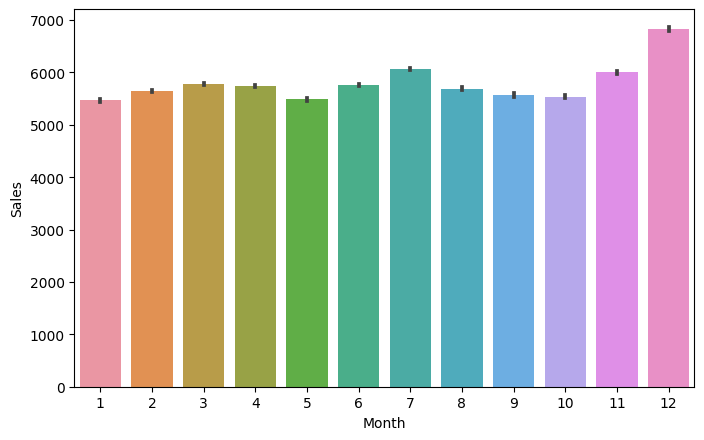

In [ ]:
# Barplot for Month and Sales column

sns.barplot(store_sales_df.Date.dt.month,store_sales_df.Sales)
plt.xlabel('Month')

* `Sales` are highest in December because of christmas holidays.

5. **Sales Vs Open :**

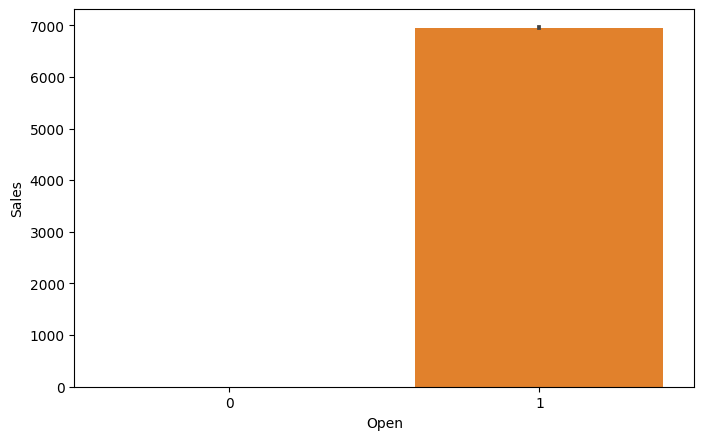

In [ ]:
# Barplot for Open and Sales column

sns.barplot(store_sales_df.Open,store_sales_df.Sales)

* There is no sales when the stores were closed.

6. **Sales Vs Promo :**

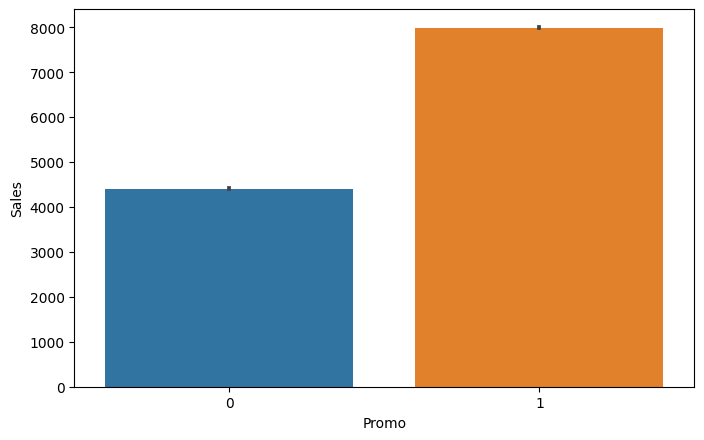

In [ ]:
# Barplot for Promo and Sales column

sns.barplot(store_sales_df.Promo,store_sales_df.Sales)

* The `Stores` with promotion has higher `Sales`.

7. **Sales Vs StateHoliday :**

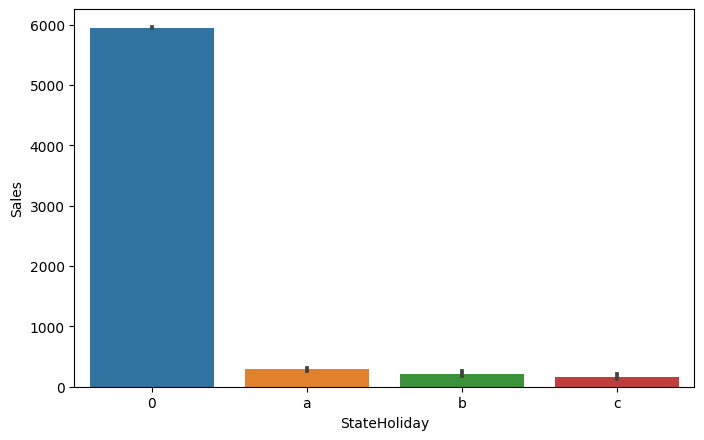

In [ ]:
# Barplot for StateHoliday and Sales column

sns.barplot(store_sales_df.StateHoliday,store_sales_df.Sales)

* `Sales ` were the most when there was no State Holiday.

8. **Sales Vs SchoolHoliday :**

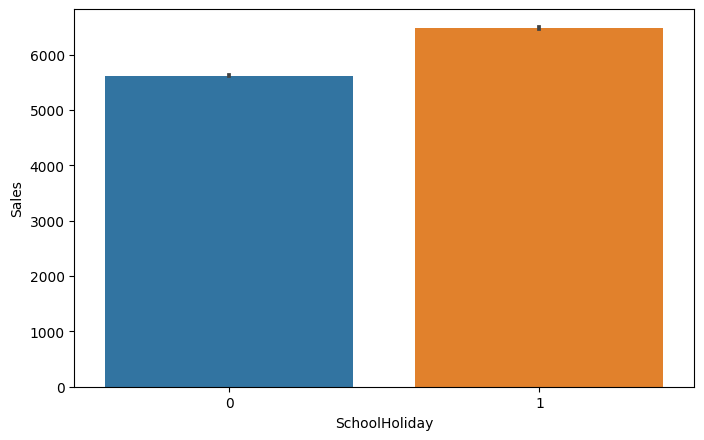

In [ ]:
# Barplot for SchoolHoliday and Sales column

sns.barplot(store_sales_df.SchoolHoliday,store_sales_df.Sales)

* The `Sales` are more when there is `SchoolHolidays`.

9. **Sales Vs StoreType :**

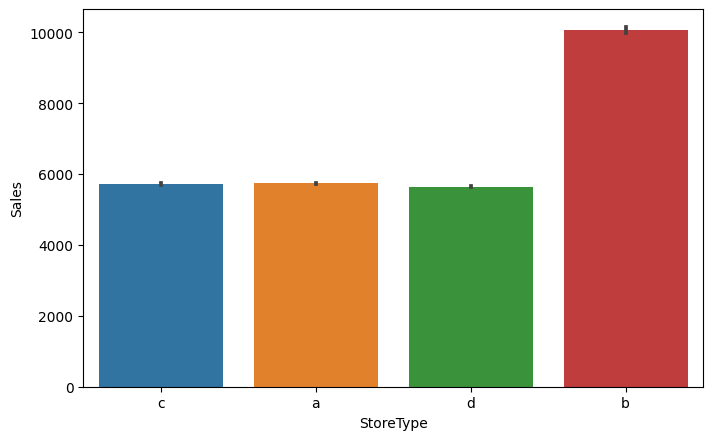

In [ ]:
# Barplot for StoreType and Sales column

sns.barplot(store_sales_df.StoreType,store_sales_df.Sales)

* `StoreType` b has the most `Sales`.

10. **Sales Vs Assortment :**

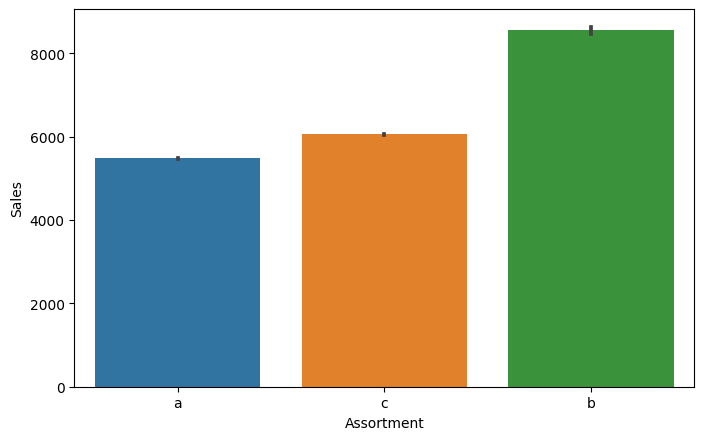

In [ ]:
# Barplot for Assortment and Sales column

sns.barplot(store_sales_df.Assortment,store_sales_df.Sales)

* The `Stores` with `Assortment` b has the most number of sales.

11. **Sales Vs CompetitionDistance :**

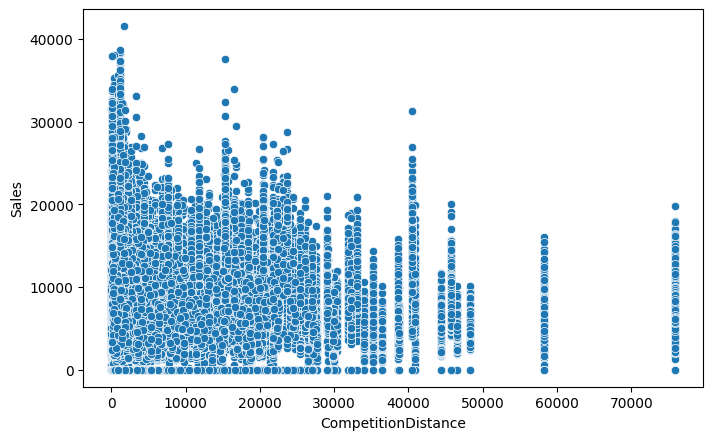

In [ ]:
# Scatterplot for CompetitionDistance and Sales column

sns.scatterplot(store_sales_df.CompetitionDistance,store_sales_df.Sales)

* The `Stores`that have the least `CompetitionDistance` have higher `Sales`.

12. **Sales Vs Promo2 :**

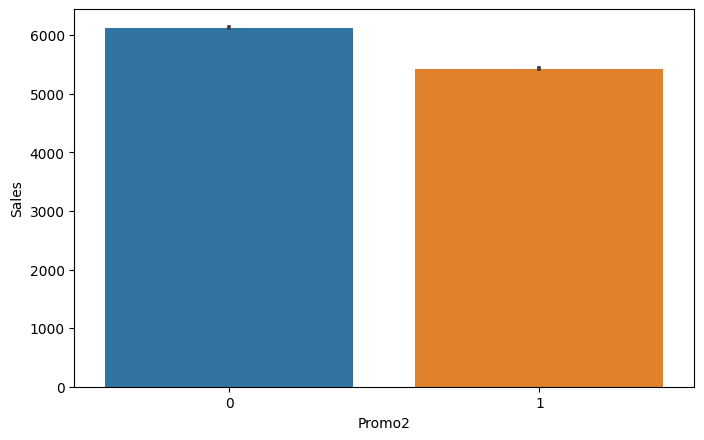

In [ ]:
# Barplot for Promo2 and Sales column

sns.barplot(store_sales_df.Promo2,store_sales_df.Sales)

* Store sales are not affected by longterm promotion.

13. **Correlation Heatmap :**

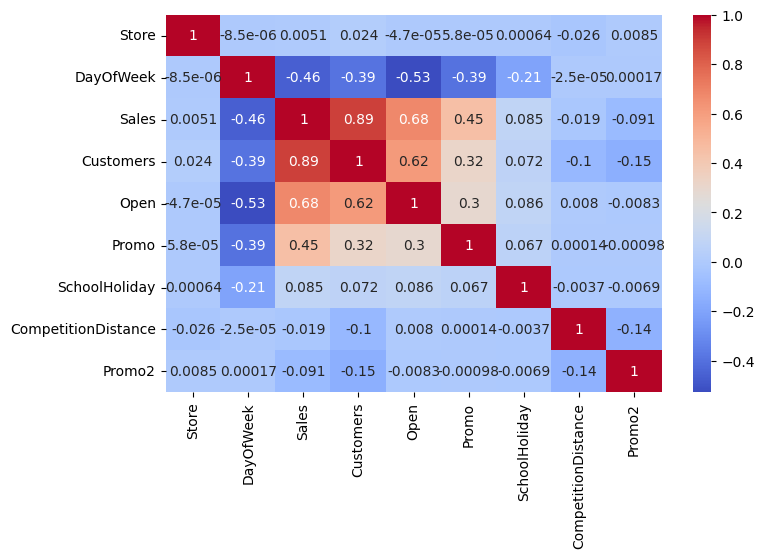

In [ ]:
# Correlation Heatmap

sns.heatmap(store_sales_df.corr(),cmap='coolwarm',annot=True)

* `Sales` column shows strong positive correlation with `Customers` and `Open` columns.
* `Sales` column shows moderate positive correlation with `Promo` column.
* `Sales` and `DayOfWeek` shows moderate negative correlation.

Now we move to the next step i.e. Hypothesis Testing where we will test the above mentioned Hypothesis.

## Hypothesis Testing :

H1: **Stores should sell more over the years :**

Text(0.5, 0, 'Month')

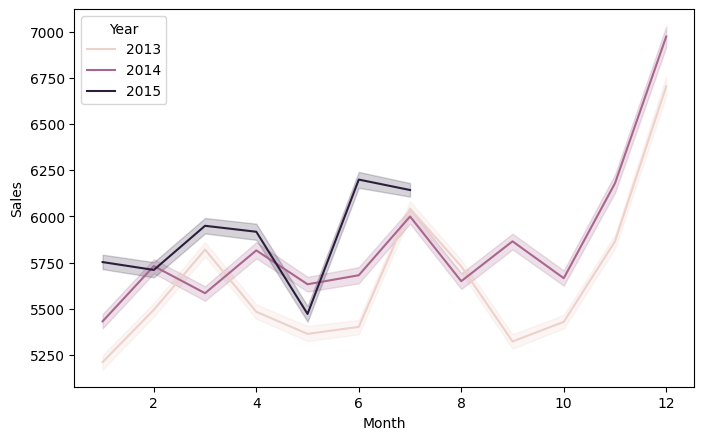

In [ ]:
# Lineplot for Month and Sales column and hue as Year column

sns.lineplot(store_sales_df.Date.dt.month,store_sales_df.Sales,hue=store_sales_df.Date.dt.year)
plt.legend(title='Year')
plt.xlabel('Month')

From the plot we can see an increase in Sales over the years. Hence, the Hypothesis is true.

H2: **Stores should sell less on weekends :**

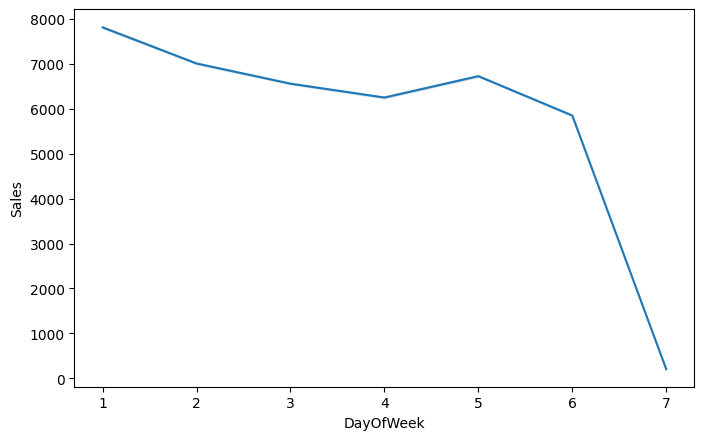

In [ ]:
# Lineplot for DayOfWeek and Sales column

sns.lineplot(store_sales_df.DayOfWeek,store_sales_df.Sales)

From the plot we can see there is gradual decrease in the `Sales` over the week and the `Sales` is the lowest for the weekend.Hence,the Hypothesis is True.

H3: **Stores with closer competitors should sell less :**

In [ ]:
# Grouping Store, Sales and CompetitionDistance column using groupby function

plot_df = store_sales_df.groupby(['Store'])[['Sales','CompetitionDistance']].agg({'Sales':'sum','CompetitionDistance':'mean'}).sort_values('CompetitionDistance')
plot_df

,Sales,CompetitionDistance
Store,,
516,4579807,20.0
882,5081054,30.0
1008,4179585,30.0
621,4608739,30.0
988,3683288,30.0
...,...,...
747,6261174,45740.0
110,3554993,46590.0
801,3798660,48330.0


Using groupby function to group `Stores` based on `Sales` and `CompetitionDistance`.

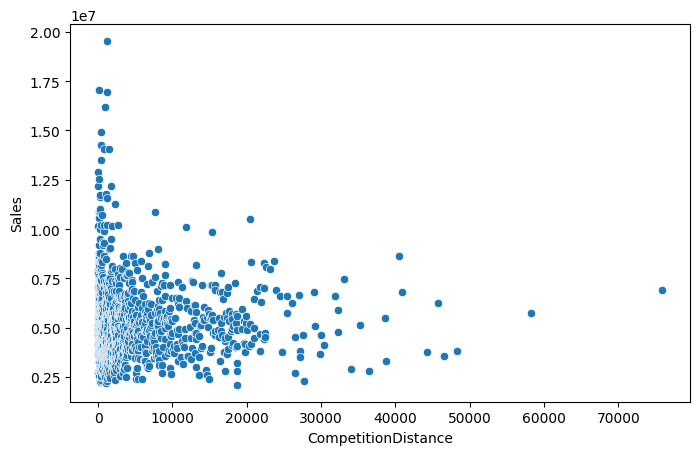

In [ ]:
# Scatterplot for CompetitionDistance and Sales column

sns.scatterplot(plot_df.CompetitionDistance,plot_df.Sales)


From the plot we can deduce `Stores`with closer competition have the higher `Sales`. Hence ,the Hypothesis is false.

H4: **Store type with a larger assortment of products should sell more :**

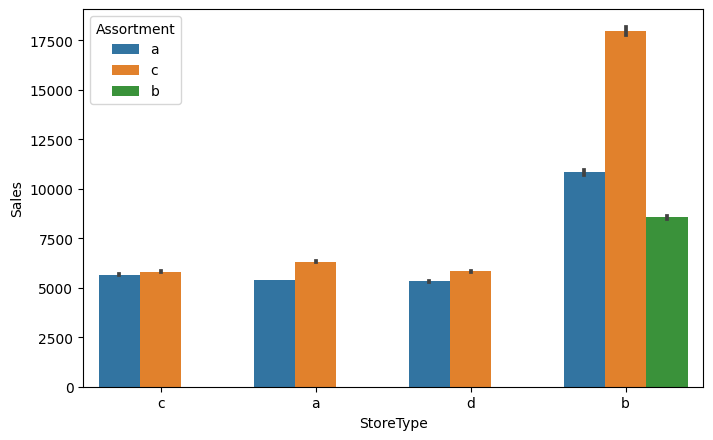

In [ ]:
# Barplot for StoreType and Sales column and hue as Assortment column

sns.barplot(store_sales_df.StoreType,store_sales_df.Sales,hue=store_sales_df.Assortment)

* `StoreType`b has all the three types of assortments , thus the sales are highest.Hence , the Hypothesis is true.

H5: **Number of Customers should have a positive correlation with Sales :**

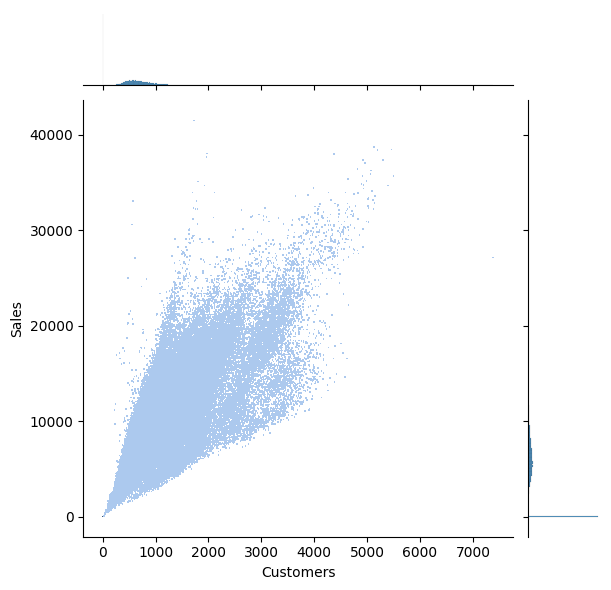

In [ ]:
# Jointplot for Customers and Sales column

sns.jointplot(store_sales_df.Customers,store_sales_df.Sales,kind='hist')

From the above plot we can see that `Sales` has linear relation with number of `Customers`.Hence , the Hypothesis is true.

H6: **Stores with promotion should have high Sales :**

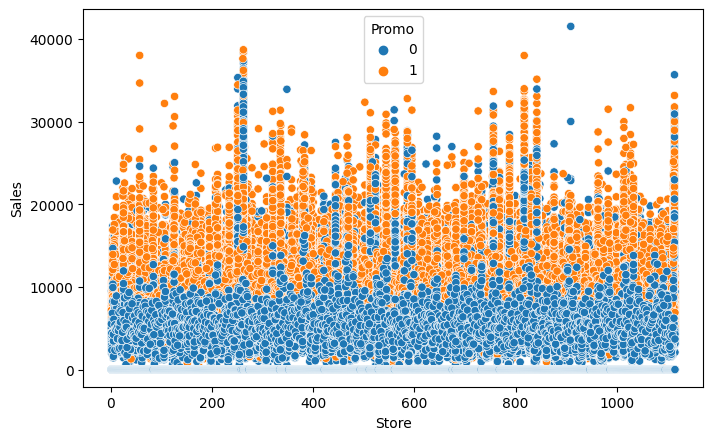

In [ ]:
# Scatterplot for Store and Sales column and hue as Promo column

sns.scatterplot(store_sales_df.Store,store_sales_df.Sales,hue=store_sales_df.Promo)

From the above plot we can see that `Stores` with promotion usually have higher Sales.Hence , the Hypothesis is true.

# Feature Engineering :

In [ ]:
# Removing rows where Stores was closed (Open == 0)

df.drop(df.index[df.Open==0],inplace=True)

In [ ]:
df.drop(df.index[(df.Sales == 0) & (df.Open == 1)],inplace=True)

In [ ]:
df.drop('Open',inplace=True,axis=1)

### For Linear Regression :

In [ ]:
new_sales_df = df.copy()

In [ ]:
new_sales_df.StateHoliday.replace({'0':0,'a':1,'b':1,'c':1},inplace=True)

In [ ]:
new_sales_df['Competition'] = new_sales_df['CompetitionDistance'].apply(lambda x: 1 if x <= 5000 else 0)

In [ ]:
# Create a new column WeekNumber

new_df['WeekNumber'] = new_df.Date.dt.weekofyear

In [ ]:
new_sales_df['DayOfWeek'] =new_sales_df['DayOfWeek'].astype(str)

In [ ]:
dummy_columns = pd.get_dummies(new_sales_df[['DayOfWeek','StoreType', 'Assortment']])

In [ ]:
new_sales_df = new_sales_df.join(dummy_columns)

In [ ]:
new_sales_df.drop(['Date','DayOfWeek','StoreType', 'Assortment', 'CompetitionDistance'], axis = 1, inplace = True)

In [ ]:
cols = list(new_sales_df.columns.values)
cols = cols[0:1] + cols[2:21] + cols[2:3]
new_sales_df = new_sales_df[cols]

In [ ]:
new_sales_df

,Store,Customers,Promo,StateHoliday,SchoolHoliday,Promo2,Competition,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Customers
0,1,555,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,555
1,2,625,1,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,625
2,3,821,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,821
3,4,1498,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1498
4,5,559,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,566,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,566
1016827,733,2377,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,2377
1016863,769,1248,0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1248
1017042,948,1039,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1039


### For Random Forest Regression :

In [ ]:
new_store_df = df.copy()

In [ ]:
new_store_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,0
1016827,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,0
1016863,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,1
1017042,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,0


# Modelling :

## Linear Regression Model :

In [ ]:
# Initializing x and y

x = new_df.drop('Sales',axis=1)
y = new_df.Sales

We hace initialized `X` and `y` where `X` has all the dependent variables and `y` has all the independent variables.

In [ ]:
# Splitting the dataset into train set and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

Here we split the dataset into two i.e. train set and test set which will be used for prediction and the percentage of test set is 20% and the rest is train set.

In [ ]:
# Scaling the train and test set

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Here we have created an instance of the MinMaxScaler class and then transformed the data through scaling.

In [ ]:
# Creating an instance of the LinearRegression class and transforming the train and test dataset

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

Here we have created an instance of the LinearRegression class and then transformed this data and model a target prediction value based on independent variables.

In [ ]:
# Inspecting the intercept

regressor.intercept_

-1078.3686925693855

The intercept for the model comes is -1078.36.

In [ ]:
# Inspecting the coefficient

regressor.coef_

array([-1.34801728e+02, -2.42854299e+02,  5.46340241e+04,  1.13911132e+03,
        2.84070284e+02,  3.94628254e+01,  2.83157988e+02, -5.19600856e+02,
        2.62694382e+02,  5.84091123e+02, -2.68060552e+03,  4.53477783e+02,
        1.64303662e+03,  1.27239173e+03, -2.83791535e+03,  1.56552361e+03])

The coefficients for the model are between -2387.91 to 54634.02.

In [ ]:
# Predicting the values from train dataset

y_pred_train = regressor.predict(x_train)

Here we used the LinearRegression class to predict values for the independent values that are present in the train set i.e. `X_train`.

In [ ]:
y_pred_train

array([ 6827.01549118, 13570.70077335,  9636.33533746, ...,
        1652.77734747,  3621.33492434,  4055.05790151])

These values are the predicted values from the Linear Regression Model for the independent varaibles that are present in the train set.

In [ ]:
# Predicting the values from test dataset

y_pred = regressor.predict(x_test)

Here we used the LinearRegression class to predict values for the independent values that are present in the test set i.e. `X_test`.

In [ ]:
y_pred

array([4436.76639582, 3348.48764331, 6313.49809748, ..., 5886.25008802,
       4360.7787244 , 4737.85977291])

These values are the predicted values from the Linear Regression Model for the independent varaibles that are present in the test set.

In [ ]:
# Function to print the metrics for the model

def model_metrics( model_name, y_train, y_pred_train, y_test, y_pred_test,):
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
    rmse_train = np.sqrt( mean_squared_error(y_train, y_pred_train))
    R2_Score_train = r2_score(y_train, y_pred_train)
    Adj_r2_train = 1 - (1-r2_score(y_train, y_pred_train)) * (len(y)-1)/(len(y)-x.shape[1]-1)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
    rmse_test = np.sqrt( mean_squared_error(y_test, y_pred_test) )
    R2_Score_test = r2_score(y_test, y_pred_test)
    Adj_r2_test = 1 - (1-r2_score(y_test, y_pred_test)) * (len(y)-1)/(len(y)-x.shape[1]-1)
    return pd.DataFrame({'Model Name': model_name,'MAE Train': mae_train, 'MAE Test': mae_test,'MAPE Train': mape_train,'MAPE Test': mape_test,'RMSE Train': rmse_train,'RMSE Test': rmse_test,'R2_Score Train':R2_Score_train, 'R2_Score Test':R2_Score_test,'Adj_r2 Train':Adj_r2_train, 'Adj_r2 Test':Adj_r2_test}, index=[0])

We will use this `model_metrics` function to print a dataframe with all the metrics for the Linear Regression Model.

In [ ]:
# Checking the metrics for the model

lrm = model_metrics( 'Linear Regression ', y_train,y_pred_train, y_test,y_pred)
lrm

,Model Name,MAE Train,MAE Test,MAPE Train,MAPE Test,RMSE Train,RMSE Test,R2_Score Train,R2_Score Test,Adj_r2 Train,Adj_r2 Test
0,Linear Regression,944.8021,941.918021,0.14411,0.144346,1299.767071,1292.875092,0.825033,0.824893,0.82503,0.82489


As we can see in the `lrm` dataframe that the `r2_score` for the Linear Regression Model is 0.825 for train set and 0.824 for test set. Hence, we can say that this model is good because it shows decent accuracy. 

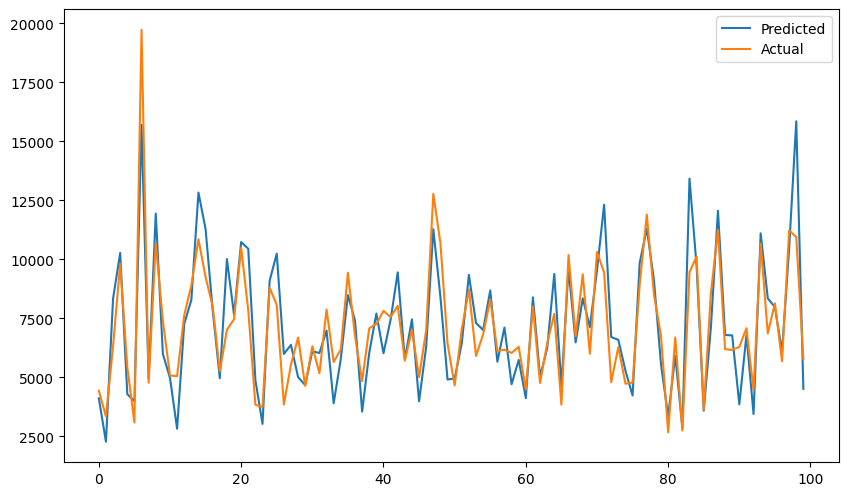

In [ ]:
# Plotting the Predicted Sales values and the Actual Sales values

plt.figure(figsize=(10,6))
plt.plot(np.array(y_test)[:100])
plt.plot(y_pred[:100])
plt.legend(["Predicted","Actual"])
plt.show()

We plotted a plot for Predicted Sales values Vs Actual Sales values and we can conclude that there are times when the model cannot predict properly. Hence, we should also look into other models as well to find the best model.

## Decision Tree Regression :

In [ ]:
# Creating an instance of the DecisionTreeRegressor class and transforming the train and test dataset

dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
# Predicting the values from train dataset

y_pred_train_dt = dt.predict(x_train)

In [ ]:
# Predicting the values from test dataset

y_pred_dt = dt.predict(x_test)

In [ ]:
# Checking the metrics for the model

dtrm = model_metrics( 'Decision Tree',y_train,y_pred_train_dt, y_test,y_pred_dt)
dtrm

,Model Name,MAE Train,MAE Test,MAPE Train,MAPE Test,RMSE Train,RMSE Test,R2_Score Train,R2_Score Test,Adj_r2 Train,Adj_r2 Test
0,Decision Tree,0.915721,491.972325,0.000162,0.072283,16.850997,753.976317,0.999971,0.940447,0.999971,0.940446


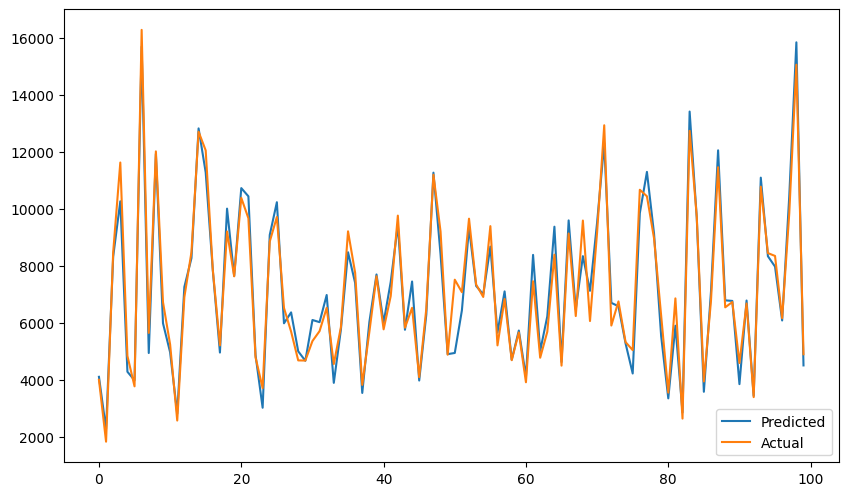

In [ ]:
# Plotting the Predicted Sales values and the Actual Sales values

plt.figure(figsize=(10,6))
plt.plot(np.array(y_test)[:100])
plt.plot(y_pred_dt[:100])
plt.legend(["Predicted","Actual"])
plt.show()

## Random Forest Regression :

In [ ]:
# Creating an instance of the RandomForestRegressor class and transforming the train and test dataset

rf = RandomForestRegressor(max_depth=8)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=8)

In [ ]:
# Predicting the values from train dataset

y_pred_train_rf = rf.predict(x_train)

In [ ]:
# Predicting the values from test dataset

y_pred_rf = rf.predict(x_test)

In [ ]:
# Checking the metrics for the model

rfrm = model_metrics( 'Random Forest Regression ',y_train,y_pred_train_rf, y_test,y_pred_rf)
rfrm

,Model Name,MAE Train,MAE Test,MAPE Train,MAPE Test,RMSE Train,RMSE Test,R2_Score Train,R2_Score Test,Adj_r2 Train,Adj_r2 Test
0,Random Forest Regression,853.533346,856.337341,0.12849,0.129219,1154.801786,1157.777003,0.861885,0.859577,0.861883,0.859574


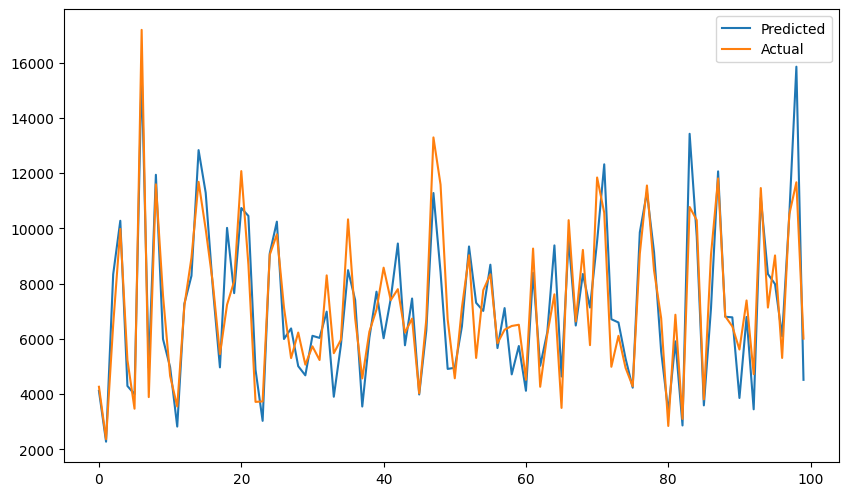

In [ ]:
# Plotting the Predicted Sales values and the Actual Sales values

plt.figure(figsize=(10,6))
plt.plot(np.array(y_test)[:100])
plt.plot(y_pred_rf[:100])
plt.legend(["Predicted","Actual"])
plt.show()

## Hyperparameter Tunning

In [ ]:
#Creating the dictionary for hyperparameters.

random_grid = {'max_depth': [10, 25, 50], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [20, 40, 60], 'n_estimators': [100, 150, 200]}

In [ ]:
# Creating an instance of the RandomForestRegressor class, Cross-validation using RandomizedSearchCV and transforming the train and test dataset. 

rf_model = RandomForestRegressor()
rf_reg = RandomizedSearchCV(estimator=rf_model, param_distributions = random_grid, cv = 3, verbose=2)
rf_reg.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time= 3.1min
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time= 3.1min
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time= 3.2min
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=40, n_estimators=100; total time= 3.1min
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=40, n_estimators=100; total time= 3.2min
[CV] END max_depth=25, min_samples_leaf=2, min_samples_split=40, n_estimators=100; total time= 3.5min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=60, n_estimators=100; total time= 2.6min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=60, n_estimators=100; total time= 2.4min
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=60, n_estimators=100; total time= 2.1min
[CV] END max_depth=10

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 25, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [20, 40, 60],
                                        'n_estimators': [100, 150, 200]},
                   verbose=2)

In [ ]:
# Inspecting the best parameters.

rf_reg.best_params_

{'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'n_estimators': 150}

In [ ]:
#Inspecting the best estimators

rf_reg_best = rf_reg.best_estimator_
rf_reg_best

RandomForestRegressor(max_depth=50, min_samples_split=20, n_estimators=150)

In [ ]:
# Predicting the values from train dataset

y_pred_train_rf_hpt = rf_reg.predict(x_train)

In [ ]:
# Predicting the values from test dataset

y_pred_rf_hpt = rf_reg.predict(x_test)

In [ ]:
# Checking the metrics for the model

hptrfrm = model_metrics( 'Random Forest Regression hyperparameter tuned',y_train,y_pred_train_rf_hpt, y_test,y_pred_rf_hpt)
hptrfrm

,Model Name,MAE Train,MAE Test,MAPE Train,MAPE Test,RMSE Train,RMSE Test,R2_Score Train,R2_Score Test,Adj_r2 Train,Adj_r2 Test
0,Random Forest Regression hyperparameter tuned,305.661222,379.293586,0.044648,0.055516,457.793898,573.587229,0.978295,0.965534,0.978294,0.965534


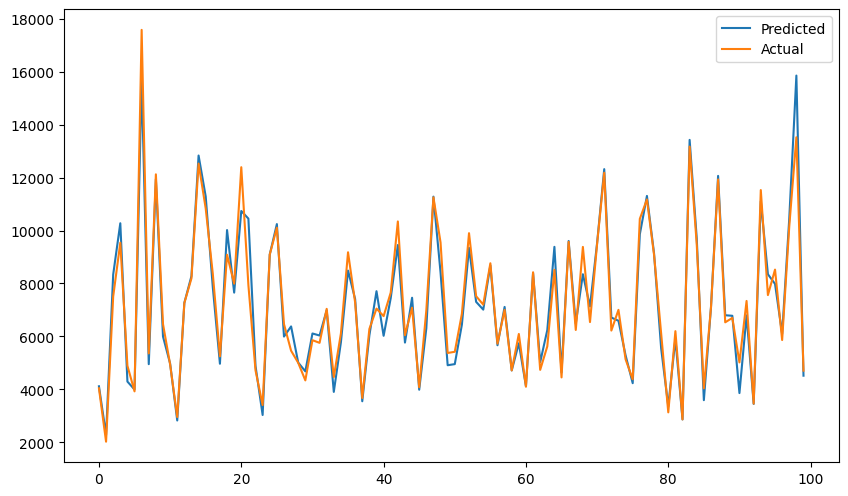

In [ ]:
# Plotting the Predicted Sales values and the Actual Sales values

plt.figure(figsize=(10,6))
plt.plot(np.array(y_test)[:100])
plt.plot(y_pred_rf_hpt[:100])
plt.legend(["Predicted","Actual"])
plt.show()

## Model Metrics Dataset :

In [ ]:
# Concatinating all the models metrics in one dataframe

model_metrics_df = pd.concat([lrm,dtrm,rfrm,hptrfrm])

In [ ]:
# Inspecting the model metrics dataframe

model_metrics_df

,Model Name,MAE Train,MAE Test,MAPE Train,MAPE Test,RMSE Train,RMSE Test,R2_Score Train,R2_Score Test,Adj_r2 Train,Adj_r2 Test
0,Linear Regression,944.802100,941.918021,0.144110,0.144346,1299.767071,1292.875092,0.825033,0.824893,0.825030,0.824890
0,Decision Tree,0.915721,491.972325,0.000162,0.072283,16.850997,753.976317,0.999971,0.940447,0.999971,0.940446
0,Random Forest Regression,853.533346,856.337341,0.128490,0.129219,1154.801786,1157.777003,0.861885,0.859577,0.861883,0.859574
0,Random Forest Regression hyperparameter tuned,305.661222,379.293586,0.044648,0.055516,457.793898,573.587229,0.978295,0.965534,0.978294,0.965534


## Feature Importance :

In [ ]:
# Setting features, importances and indices values

features = x.columns
importances = rf_reg_best.feature_importances_
indices = np.argsort(importances)

Text(0.5, 0, 'Relative Importance')

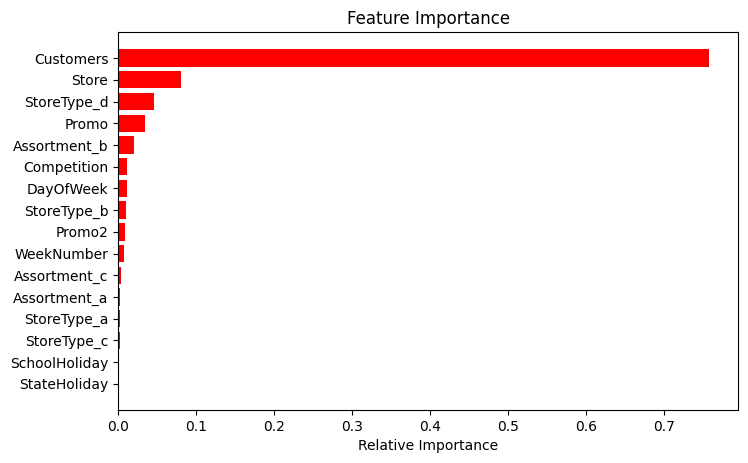

In [ ]:
#Plotting feature importance

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')